In [4]:
%pip install mlxtend --upgrade
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from mlxtend.evaluate import bias_variance_decomp
import plotly.express as px
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
#read dataset 
df = pd.read_csv("Shill Bidding Dataset.csv")
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


**preprocessing**


In [6]:
#check null cells
df.isnull().sum()


Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [7]:
#drop duplicates and irrelivent features
df.drop_duplicates(keep = 'first', inplace = True)
df.drop(["Record_ID","Auction_ID","Bidder_ID"],axis='columns', inplace=True)
df.describe()


,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


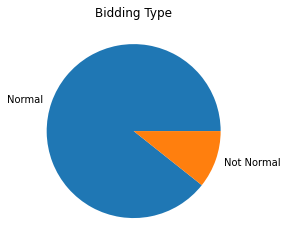

0    5646
1     675
Name: Class, dtype: int64

In [8]:
#check data set balane
classes=df['Class'].value_counts()
plt.pie(classes,labels = ['Normal', 'Not Normal'])  
plt.title ("Bidding Type")
plt.show()
classes

data is unbalanced and will require a balancing technique 

**balancing the data**

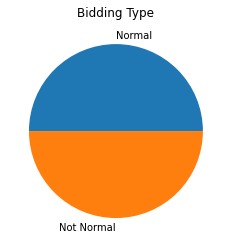

0    5646
1    5646
Name: Class, dtype: int64

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
#splitting the data set into training and testing data
X = df.iloc[:, :9].values
y = df["Class"].values
#balancing the dataset using Smote
smoteSampler = SMOTE(random_state=42)
smoteX,smoteY=smoteSampler.fit_resample(X, y)
#spliting the train and test data once with smote and once without it
X_train,X_test, y_train, y_test = train_test_split(smoteX, smoteY, test_size=0.4, random_state=1)
X_train2,X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=1)
#summary of Classes after SMOTE
classes=pd.DataFrame(smoteY,columns=['Class'])['Class'].value_counts()
plt.pie(classes,labels = ['Normal', 'Not Normal'])  
plt.title ("Bidding Type")
plt.show()
classes

data is now balanced 

# **svm: with smote**

**finding best kernal**

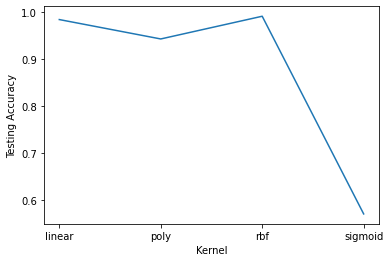

In [10]:
#finding best kernal depending on acurrecy
kernels = ['linear','poly','rbf','sigmoid']
scores = []
#train a model for each kernal and test it's accurecy
for k in kernels:
    svmm = svm.SVC(kernel=k,probability=True,random_state=4)
    svmm.fit(X_train,y_train)
    svmm_pred = svmm.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, svmm_pred))
#plot a graph of each kernal accurecy
plt.plot(kernels, scores)
plt.xlabel('Kernel')
plt.ylabel('Testing Accuracy')
plt.show()

In [11]:
max_value = max(scores)
max_index = scores.index(max_value)
print(kernels[max_index])

rbf


In [12]:
#overwrite the last model with the highest accurecy model
svmm =  svm.SVC(kernel=kernels[max_index],probability=True)
clf = svmm.fit(X_train,y_train)
svmm_pred = svmm.predict(X_test)
print("Accuracy on training set: {:.6f}".format(svmm.score(X_train, y_train)))
print("Accuracy on test set: {:.6f}".format(svmm.score(X_test, y_test)))



Accuracy on training set: 0.992620
Accuracy on test set: 0.991809


In [13]:

print(classification_report(y_test,svmm_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2261
           1       0.99      1.00      0.99      2256

    accuracy                           0.99      4517
   macro avg       0.99      0.99      0.99      4517
weighted avg       0.99      0.99      0.99      4517



**SVM:visualization**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


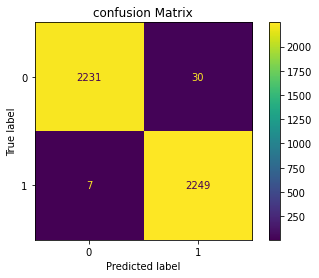

In [14]:
plot_confusion_matrix(svmm, X_test, y_test)  
plt.title('confusion Matrix')
plt.show()

564
[282 282]


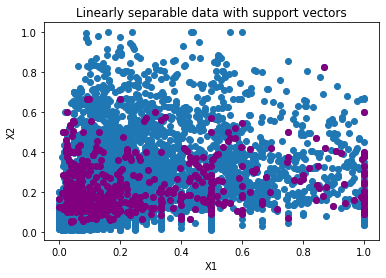

In [15]:
# Get support vector indices
support_vector_indices = clf.support_
print(len(support_vector_indices))

# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='purple')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

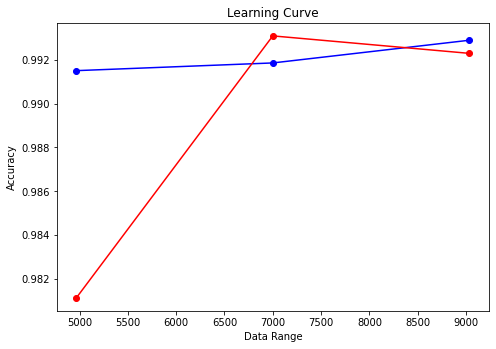

In [16]:
#create learning curve
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(svmm, smoteX, smoteY,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
#plot learning curve
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

# **Nural network: with smote**

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
# ceate archtecture
ann = models.Sequential([
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(2, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = ann.fit(X_train, y_train ,verbose=1, epochs=5, 
                    validation_data=(X_test, y_test))

Epoch 1/5
212/212 [==============================] - 7s 16ms/step - loss: 0.4805 - accuracy: 0.8707 - val_loss: 0.3231 - val_accuracy: 0.9305
Epoch 2/5
212/212 [==============================] - 2s 11ms/step - loss: 0.2367 - accuracy: 0.9641 - val_loss: 0.1917 - val_accuracy: 0.9754
Epoch 3/5
212/212 [==============================] - 2s 9ms/step - loss: 0.1386 - accuracy: 0.9860 - val_loss: 0.1094 - val_accuracy: 0.9889
Epoch 4/5
212/212 [==============================] - 2s 11ms/step - loss: 0.0991 - accuracy: 0.9866 - val_loss: 0.0836 - val_accuracy: 0.9889
Epoch 5/5
212/212 [==============================] - 2s 10ms/step - loss: 0.0815 - accuracy: 0.9867 - val_loss: 0.0714 - val_accuracy: 0.9889


In [19]:
ann.evaluate(X_test,y_test)

142/142 [==============================] - 1s 6ms/step - loss: 0.0714 - accuracy: 0.9889


[0.07138726860284805, 0.9889307022094727]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
yp = ann.predict(X_test)

y_pred = []
# make predected data comparble with lebaled data
for element in yp:
    
    if element[0] > 0.5:
         y_pred.append(0)
          
    else:
        y_pred.append(1)
        

print(classification_report(y_test,y_pred))        


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2261
           1       0.98      1.00      0.99      2256

    accuracy                           0.99      4517
   macro avg       0.99      0.99      0.99      4517
weighted avg       0.99      0.99      0.99      4517



**visualization**

Text(69.0, 0.5, 'Truth')

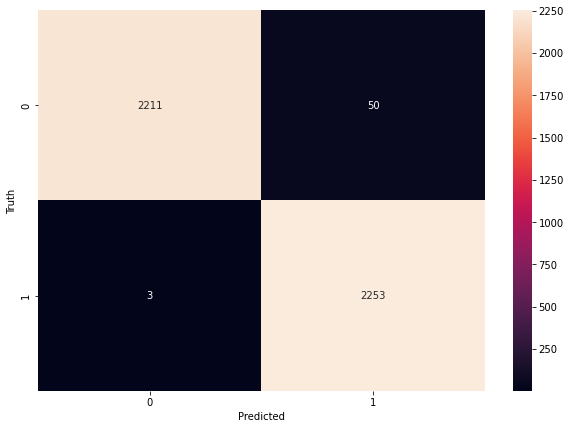

In [21]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

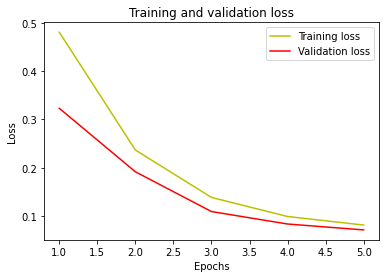

In [22]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





# **Nural network: without smote**


In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
#create archtecture
ann = models.Sequential([
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(2, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = ann.fit(X_train2, y_train2 ,verbose=1, epochs=5, 
                    validation_data=(X_test2, y_test2))

Epoch 1/5
119/119 [==============================] - 3s 15ms/step - loss: 0.3885 - acc: 0.8832 - val_loss: 0.3263 - val_acc: 0.8980
Epoch 2/5
119/119 [==============================] - 1s 12ms/step - loss: 0.3184 - acc: 0.8900 - val_loss: 0.2743 - val_acc: 0.8980
Epoch 3/5
119/119 [==============================] - 1s 10ms/step - loss: 0.2618 - acc: 0.8937 - val_loss: 0.2202 - val_acc: 0.9091
Epoch 4/5
119/119 [==============================] - 1s 12ms/step - loss: 0.2072 - acc: 0.9227 - val_loss: 0.1740 - val_acc: 0.9620
Epoch 5/5
119/119 [==============================] - 1s 10ms/step - loss: 0.1605 - acc: 0.9557 - val_loss: 0.1379 - val_acc: 0.9628


In [24]:
ann.evaluate(X_test2,y_test2)

80/80 [==============================] - 0s 5ms/step - loss: 0.1379 - acc: 0.9628


[0.13790163397789001, 0.9628311395645142]

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
yp = ann.predict(X_test2)

y_pred = []

# make predected data comparble with lebaled data
for element in yp:
    
    if element[0] > 0.5:
         y_pred.append(0)
          
    else:
        y_pred.append(1)
        
print(classification_report(y_test2,y_pred)) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2271
           1       0.98      0.68      0.80       258

    accuracy                           0.97      2529
   macro avg       0.97      0.84      0.89      2529
weighted avg       0.97      0.97      0.96      2529



**NN without smote visualization**


Text(69.0, 0.5, 'Truth')

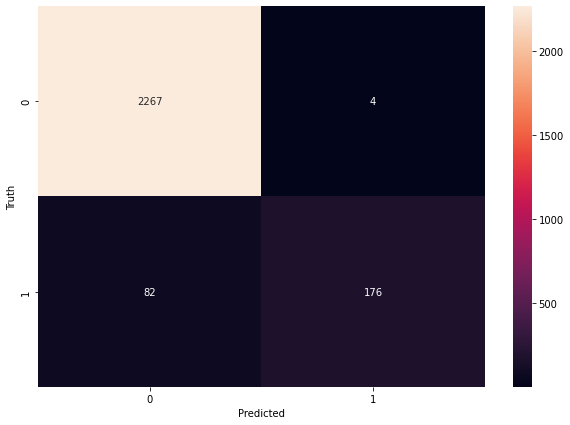

In [26]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test2,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

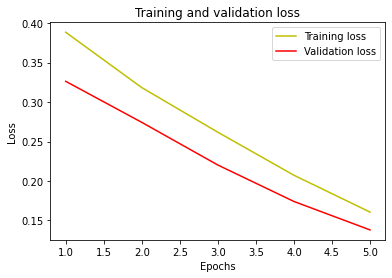

In [27]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **SVM:without smote**

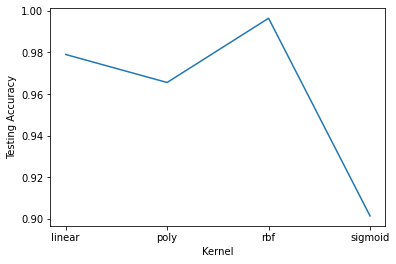

In [28]:
kernels = ['linear','poly','rbf','sigmoid']
scores = []
#find the most accurate kernal on the datawithout smote
for k in kernels:
    svmm = svm.SVC(kernel=k,probability=True,random_state=4)
    svmm.fit(X_train2,y_train2)
    svmm_pred = svmm.predict(X_test2)
    scores.append(metrics.accuracy_score(y_test2, svmm_pred))
plt.plot(kernels, scores)
plt.xlabel('Kernel')
plt.ylabel('Testing Accuracy')
plt.show()

rbf is still the most accurate kernal but with a huge diffrance

In [29]:
max_value = max(scores)
max_index = scores.index(max_value)
print(kernels[max_index])

rbf


In [30]:
svmm =  svm.SVC(kernel=kernels[max_index],probability=True)
clf = svmm.fit(X_train2,y_train2)
svmm_pred = svmm.predict(X_test2)
print("Accuracy on training set: {:.6f}".format(svmm.score(X_train2, y_train2)))
print("Accuracy on test set: {:.6f}".format(svmm.score(X_test2, y_test2)))

Accuracy on training set: 0.996308
Accuracy on test set: 0.996441


In [31]:
print(classification_report(y_test2,svmm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2271
           1       0.98      0.99      0.98       258

    accuracy                           1.00      2529
   macro avg       0.99      0.99      0.99      2529
weighted avg       1.00      1.00      1.00      2529



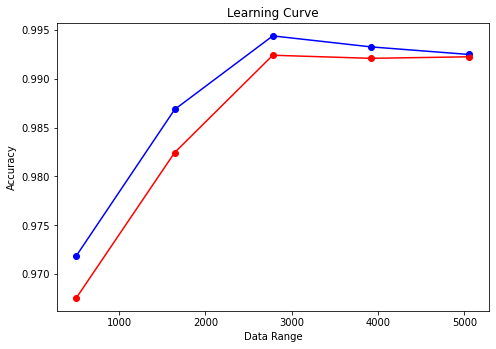

In [32]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(svmm, X, y,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


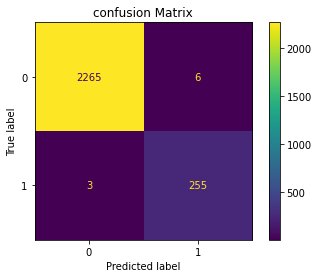

In [33]:
plot_confusion_matrix(svmm, X_test2, y_test2)  
plt.title('confusion Matrix')
plt.show()

353
[179 174]


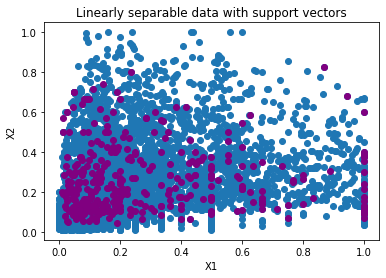

In [34]:
# Get support vector indices
support_vector_indices = clf.support_
print(len(support_vector_indices))

# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='purple')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()